In [212]:
#!pip install investpy
#!pip install yfinance
#!pip install quandl
#!pip install sweetviz
#!pip install request_html
#!pip install yahoo_fin

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
### yfinance

In [22]:
import yfinance as yf

In [40]:
msft = yf.download('MSFT',start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [45]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,335.350006,338.000000,329.779999,334.750000,330.092285,28865100
2022-01-04,334.829987,335.200012,326.119995,329.010010,324.432159,32674300
2022-01-05,325.859985,326.070007,315.980011,316.380005,311.977875,40054300
2022-01-06,313.149994,318.700012,311.489990,313.880005,309.512634,39646100
2022-01-07,314.149994,316.500000,310.089996,314.040009,309.670410,32720000


In [46]:
type(msft)

pandas.core.frame.DataFrame

In [49]:
msft_ohlc = msft[['Open','High','Low','Close']]
msft_ohlc.head()

,Open,High,Low,Close
Date,,,,
2022-01-03,335.350006,338.000000,329.779999,334.750000
2022-01-04,334.829987,335.200012,326.119995,329.010010
2022-01-05,325.859985,326.070007,315.980011,316.380005
2022-01-06,313.149994,318.700012,311.489990,313.880005
2022-01-07,314.149994,316.500000,310.089996,314.040009


In [50]:
abev = yf.download('ABEV3.SA',start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [51]:
abev_ohlc = abev[['Open','High','Low','Close']]
abev_ohlc.head()

,Open,High,Low,Close
Date,,,,
2022-01-03,15.42,15.54,15.15,15.33
2022-01-04,15.32,15.40,15.04,15.31
2022-01-05,15.25,15.29,14.96,15.01
2022-01-06,15.04,15.06,14.66,14.77
2022-01-07,14.80,14.80,14.45,14.53


- exportar arquivo .csv

In [55]:
abev_ohlc.to_csv('ambev.csv',sep=';',decimal=',')

- ler aquivo .csv com formato OHLC

In [73]:
ambev = pd.read_csv('ambev.csv',sep=';',decimal=',')

In [71]:
ambev.head()

,Date,Open,High,Low,Close
0,2022-01-03,15.42,15.54,15.15,15.33
1,2022-01-04,15.32,15.40,15.04,15.31
2,2022-01-05,15.25,15.29,14.96,15.01
3,2022-01-06,15.04,15.06,14.66,14.77
4,2022-01-07,14.80,14.80,14.45,14.53


- transformar date de objeto para datetime 

In [76]:
ambev['Date'] = pd.to_datetime(ambev['Date'])

In [77]:
type(ambev.index)

pandas.core.indexes.range.RangeIndex

In [78]:
ambev.set_index('Date', inplace=True)

In [79]:
ambev.head()

,Open,High,Low,Close
Date,,,,
2022-01-03,15.42,15.54,15.15,15.33
2022-01-04,15.32,15.40,15.04,15.31
2022-01-05,15.25,15.29,14.96,15.01
2022-01-06,15.04,15.06,14.66,14.77
2022-01-07,14.80,14.80,14.45,14.53


<Axes: xlabel='Date'>

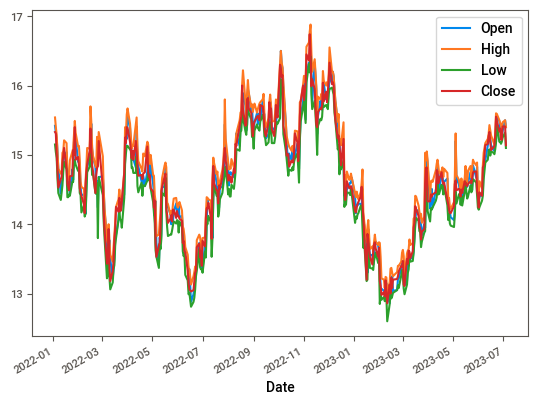

In [80]:
ambev.plot()

In [81]:
type(ambev.index)

pandas.core.indexes.datetimes.DatetimeIndex

- Merge de dados no formato OHLC

In [82]:
petr4 = yf.download('PETR4.SA',start='2022-07-01',end='2023-07-01')
lren3 = yf.download('LREN3.SA',start='2022-07-01',end='2023-07-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [83]:
petr4.rename(columns={'Adj Close':'PETR4'}, inplace=True)

In [84]:
lren3.rename(columns={'Adj Close':'LREN3'}, inplace=True)

In [85]:
df = pd.merge(lren3,petr4, how='inner', on='Date')

In [86]:
new_df = df[['LREN3','PETR4']]

In [87]:
new_df.head()

,LREN3,PETR4
Date,,
2022-07-01,22.323061,16.979118
2022-07-04,22.255415,17.342148
2022-07-05,22.313396,16.681551
2022-07-06,23.057499,16.467304
2022-07-07,23.917564,16.949362


---
### sweetviz

In [32]:
import sweetviz as sv

In [35]:
relatorio = sv.analyze(new_df)

C:\Users\Victor\AppData\Roaming\Python\Python310\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\Victor\AppData\Roaming\Python\Python310\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

C:\Users\Victor\AppData\Roaming\Python\Python310\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\Victor\AppData\Roaming\Python\Python310\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()


In [36]:
relatorio.show_html('Relatorio_PETR4_LREN3.html')

Report Relatorio_PETR4_LREN3.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


---
### pandas_datareader

In [98]:
# !pip install -U pandas_datareader

In [101]:
import pandas_datareader as pdr

In [113]:
# esse passo foi necessários pois o pandas_datareader não está funcionando legal com o yahoo
import yfinance as yf
yf.pdr_override()

In [119]:
bova11 = pdr.data.get_data_yahoo('BOVA11.SA', start='2022-07-01')

[*********************100%***********************]  1 of 1 completed


In [120]:
bova11.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-01,94.360001,95.849998,93.809998,95.629997,95.629997,7251049
2022-07-04,94.989998,95.870003,94.750000,95.199997,95.199997,6036832
2022-07-05,94.419998,94.919998,93.059998,94.800003,94.800003,7250109
2022-07-06,94.580002,95.660004,93.970001,95.419998,95.419998,6343177
2022-07-07,96.620003,97.910004,96.580002,97.379997,97.379997,8341836


In [121]:
bova11.shape

(252, 6)

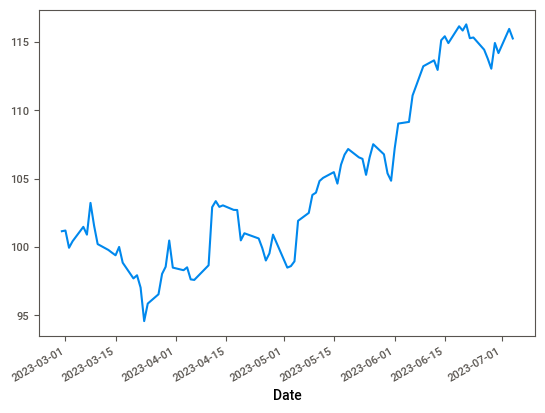

In [122]:
#últimos 90 dias
bova11.Close.iloc[165:252].plot();

- conceito de normalização

In [194]:
lista = ['WEGE3.SA','MGLU3.SA','^BVSP','HCTR11.SA']
lista2 = ['WEGE3.SA','MGLU3.SA','HCTR11.SA']

In [174]:
data = pd.DataFrame()

In [175]:
for i in lista:
    data[i]=pdr.data.get_data_yahoo(i, start='2022-07-01').Close

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [177]:
data.head()

,WEGE3.SA,MGLU3.SA,^BVSP,HCTR11.SA
Date,,,,
2022-07-01,26.500000,2.20,98954.0,113.500000
2022-07-04,26.490000,2.13,98609.0,114.190002
2022-07-05,27.020000,2.38,98295.0,114.500000
2022-07-06,27.100000,2.50,98719.0,114.620003
2022-07-07,27.610001,2.56,100730.0,114.010002


In [179]:
data_clean = data.dropna()

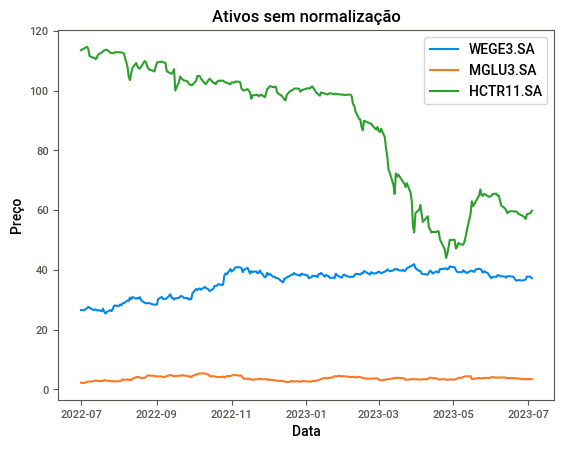

In [195]:
#plot sem normalizar
plt.plot(data.index,data[lista2])
plt.title('Ativos sem normalização')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend(lista2)
plt.show()

- normalizar = dividir todos valores de cada coluna pelo primeiro valor

In [196]:
data_norm = data/data.iloc[0]

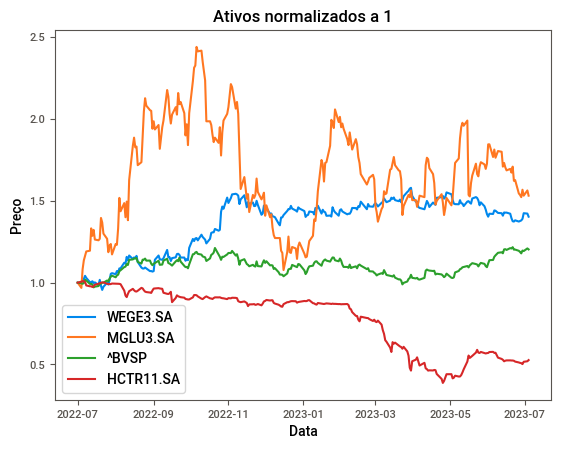

In [198]:
#plot normalizado a 1
plt.plot(data_norm.index,data_norm[lista])
plt.title('Ativos normalizados a 1')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend(lista)
plt.show()

- teste % change

In [206]:
data_perc = data.pct_change()

In [207]:
data_perc

,WEGE3.SA,MGLU3.SA,^BVSP,HCTR11.SA
Date,,,,
2022-07-01,NaN,NaN,NaN,NaN
2022-07-04,-0.000377,-0.031818,-0.003486,0.006079
2022-07-05,0.020008,0.117371,-0.003184,0.002715
2022-07-06,0.002961,0.050420,0.004314,0.001048
2022-07-07,0.018819,0.024000,0.020371,-0.005322
...,...,...,...,...
2023-06-28,0.002192,-0.008876,-0.007165,-0.003111
2023-06-29,0.007108,0.029851,0.014587,-0.011789
2023-06-30,0.024701,-0.023188,-0.002500,0.028421


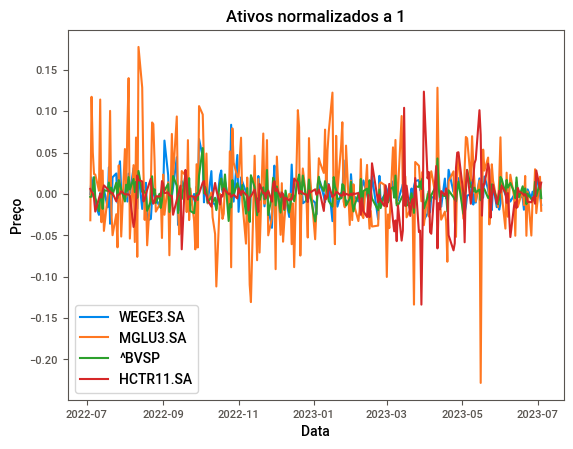

In [208]:
#plot normalizado, % change
plt.plot(data_perc.index,data_perc[lista])
plt.title('Ativos normalizados a 1')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend(lista)
plt.show()

In [209]:
data_acum = (1+data_perc).cumprod()-1

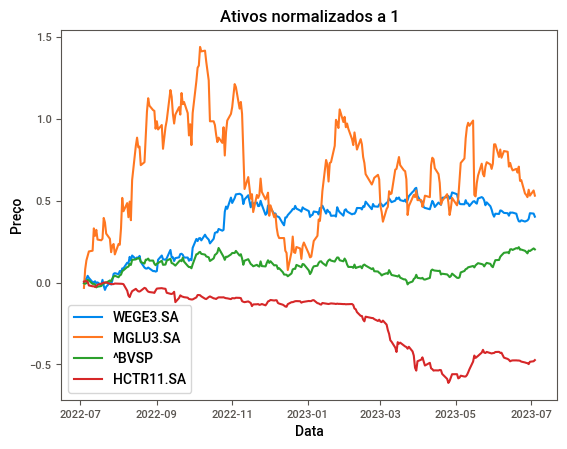

In [210]:
#plot normalizado, % change acumulado
plt.plot(data_acum.index,data_acum[lista])
plt.title('Ativos normalizados a 1')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend(lista)
plt.show()

---
### yahoo_fin

In [213]:
from yahoo_fin import stock_info as si

In [233]:
si.get_live_price('ETH-USD')

1939.952880859375

In [235]:
import time
import datetime

In [239]:
tempo = time.time() + 60

In [247]:
ind = 0
df = pd.DataFrame(columns = ['Hora','Preço'])
tempo = time.time() + 60

while time.time() < tempo:
    
    preco = si.get_live_price('ETH-USD')
    tempo_real = datetime.datetime.fromtimestamp(time.time())
    tempo_real = tempo_real.strftime("%d-%b-%Y %H:%M:%S")
    
    d = {'Hora':tempo_real,'Preço':preco}
    print(d)
    
    linha = pd.DataFrame(data = d, index = [ind])
    ind += 1
    
    df = pd.concat([df, linha], ignore_index = True)
    
    time.sleep(5)

{'Hora': '05-Jul-2023 01:02:13', 'Preço': 1941.50830078125}
{'Hora': '05-Jul-2023 01:02:19', 'Preço': 1941.50830078125}
{'Hora': '05-Jul-2023 01:02:24', 'Preço': 1941.50830078125}
{'Hora': '05-Jul-2023 01:02:30', 'Preço': 1941.5595703125}
{'Hora': '05-Jul-2023 01:02:36', 'Preço': 1941.5595703125}
{'Hora': '05-Jul-2023 01:02:41', 'Preço': 1941.5595703125}
{'Hora': '05-Jul-2023 01:02:47', 'Preço': 1941.5595703125}
{'Hora': '05-Jul-2023 01:02:52', 'Preço': 1941.5595703125}
{'Hora': '05-Jul-2023 01:02:58', 'Preço': 1941.5595703125}
{'Hora': '05-Jul-2023 01:03:03', 'Preço': 1941.5595703125}
{'Hora': '05-Jul-2023 01:03:08', 'Preço': 1941.5595703125}


In [250]:
df.set_index('Hora',inplace=True)

In [252]:
df

,Preço
Hora,
05-Jul-2023 01:02:13,1941.508301
05-Jul-2023 01:02:19,1941.508301
05-Jul-2023 01:02:24,1941.508301
05-Jul-2023 01:02:30,1941.559570
05-Jul-2023 01:02:36,1941.559570
05-Jul-2023 01:02:41,1941.559570
05-Jul-2023 01:02:47,1941.559570
05-Jul-2023 01:02:52,1941.559570
05-Jul-2023 01:02:58,1941.559570
